In [13]:
from pycocotools import mask

import skimage.io as skio
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import os

import json

In [58]:
alljson = {}
alljson['info'] = {'contributor': '',
                   'date_created': '2016-09-16 09:11:52.357475',
                   'description': 'This custom version of the 2014 MS COCO dataset.',
                   'url': '',
                   'version': '1.0',
                   'year': 2014}
alljson['categories'] = [{'id': 1, 
                          'name': 'man_blazers_sport_coats', 
                          'supercategory': 'man_blazers_sport_coats'}]
alljson['licenses'] = [{'id': 1,
                        'name': 'Attribution-NonCommercial-ShareAlike License',
                        'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'}]

images = []
annots = []

imgs = sorted(os.listdir('images'))
for img in imgs:
    if img[-4:] != '.png':
        if not os.path.isfile('images/'+img.split('.')[0]+'.png'):
            continue
        im = skio.imread('images/'+img)
        maskfile = skio.imread('images/'+img.split('.')[0]+'.png')
        if len(maskfile.shape) == 3:
            msk = (maskfile[:, :, 0] == 255) * (maskfile[:, :, 1] == 255) * (maskfile[:, :, 2] == 255)
        else:
            msk = maskfile == 255
        kl = mask.encode(msk.astype('uint8', order='F').reshape(im.shape[0], im.shape[1], 1, order='F')) 
        images.append({'coco_url': '',
                       'date_captured': '2013-11-14 16:28:13',
                       'file_name': img,
                       'flickr_url': '',
                       'height': im.shape[0],
                       'id': int(img.split('.')[0]),
                       'license': 1,
                       'width': im.shape[1]})
        annots.append({'id': 10000000+int(img.split('.')[0]), 
                     'category_id': 1, 
                     'image_id': int(img.split('.')[0]), 
                     'segmentation': kl, 
                     'bbox': list(mask.toBbox(kl)[0]), 
                     'area': msk.sum(), 
                     'iscrowd': 0})
alljson['images'] = images
alljson['annotations'] = annots

In [59]:
with open('./annots.json', 'w') as f:
    json.dump(alljson, f)

In [108]:
train_imgs = imgs[:3501]
val_imgs = imgs[3501:]

In [109]:
train_json = {}
train_json['info'] = {'contributor': '',
                   'date_created': '2016-09-16 09:11:52.357475',
                   'description': 'This custom version of the 2014 MS COCO dataset.',
                   'url': '',
                   'version': '1.0',
                   'year': 2014}
train_json['categories'] = [{'id': 1, 
                          'name': 'man_blazers_sport_coats', 
                          'supercategory': 'man_blazers_sport_coats'}]
train_json['licenses'] = [{'id': 1,
                        'name': 'Attribution-NonCommercial-ShareAlike License',
                        'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'}]

images = []
annots = []

imgs = sorted(os.listdir('images'))
for img in train_imgs:
    if img[-4:] != '.png':
        if not os.path.isfile('images/'+img.split('.')[0]+'.png'):
            continue
        im = skio.imread('images/'+img)
        maskfile = skio.imread('images/'+img.split('.')[0]+'.png')
        if len(maskfile.shape) == 3:
            msk = (maskfile[:, :, 0] == 255) * (maskfile[:, :, 1] == 255) * (maskfile[:, :, 2] == 255)
        else:
            msk = maskfile == 255
        kl = mask.encode(msk.astype('uint8', order='F').reshape(im.shape[0], im.shape[1], 1, order='F')) 
        images.append({'coco_url': '',
                       'date_captured': '2013-11-14 16:28:13',
                       'file_name': img,
                       'flickr_url': '',
                       'height': im.shape[0],
                       'id': int(img.split('.')[0]),
                       'license': 1,
                       'width': im.shape[1]})
        annots.append({'id': 10000000+int(img.split('.')[0]), 
                     'category_id': 1, 
                     'image_id': int(img.split('.')[0]), 
                     'segmentation': kl[0], 
                     'bbox': list(mask.toBbox(kl)[0]), 
                     'area': msk.sum(), 
                     'iscrowd': 0})
train_json['images'] = images
train_json['annotations'] = annots
with open('./deepmask/data/annotations/instances_train2014.json', 'w') as f:
    json.dump(train_json, f)

In [ ]:
val_json = {}
val_json['info'] = {'contributor': '',
                   'date_created': '2016-09-16 09:11:52.357475',
                   'description': 'This custom version of the 2014 MS COCO dataset.',
                   'url': '',
                   'version': '1.0',
                   'year': 2014}
val_json['categories'] = [{'id': 1, 
                          'name': 'man_blazers_sport_coats', 
                          'supercategory': 'man_blazers_sport_coats'}]
val_json['licenses'] = [{'id': 1,
                        'name': 'Attribution-NonCommercial-ShareAlike License',
                        'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/'}]

images = []
annots = []

imgs = sorted(os.listdir('images'))
for img in val_imgs:
    if img[-4:] != '.png':
        if not os.path.isfile('images/'+img.split('.')[0]+'.png'):
            continue
        im = skio.imread('images/'+img)
        maskfile = skio.imread('images/'+img.split('.')[0]+'.png')
        if len(maskfile.shape) == 3:
            msk = (maskfile[:, :, 0] == 255) * (maskfile[:, :, 1] == 255) * (maskfile[:, :, 2] == 255)
        else:
            msk = maskfile == 255
        kl = mask.encode(msk.astype('uint8', order='F').reshape(im.shape[0], im.shape[1], 1, order='F')) 
        images.append({'coco_url': '',
                       'date_captured': '2013-11-14 16:28:13',
                       'file_name': img,
                       'flickr_url': '',
                       'height': im.shape[0],
                       'id': int(img.split('.')[0]),
                       'license': 1,
                       'width': im.shape[1]})
        annots.append({'id': 10000000+int(img.split('.')[0]), 
                     'category_id': 1, 
                     'image_id': int(img.split('.')[0]), 
                     'segmentation': kl[0], 
                     'bbox': list(mask.toBbox(kl)[0]), 
                     'area': msk.sum(), 
                     'iscrowd': 0})
val_json['images'] = images
val_json['annotations'] = annots
with open('./deepmask/data/annotations/instances_val2014.json', 'w') as f:
    json.dump(val_json, f)

In [ ]:
for img in train_imgs:
    if img[-4:] != '.png':
        !cp images/$img deepmask/data/train2014/$img

In [ ]:
for img in val_imgs:
    if img[-4:] != '.png':
        !cp images/$img deepmask/data/val2014/$img

In [86]:
kl

[{'counts': 'gn:2R:g0jKIUMg0[2MmKg1l3f2G9K4L5L3N3L3L5L3L5H7@a0L3N3M3M1O2N1O1O100O1O100O10000O10000O1O001O10O01O010O1O10000O100O1O100O100O100O100O1O100O1O100O1O100O1O1O1O1O1O1O1M32N2O0O4^H_Nh5b1RJeNk5]1PJhNn5[1bITO\\6d2O2O0O2N2N2N2N2N4M5J4L3M3N3L2N3N1N2N2N3M01N1N2N2O1N2O1N2O1N3M2O1N2N2N2N2M3M3L4G9J6TOl0C=L4M3N2L4N2N2N2M3N2O1O11O1O1O001O001O001O001O001O001O001O0O2O0O2O0O101N1O101N1O1O101N1O3M2N2O1N2N3M3L4M3M2N3N2M3M3M3M2N3N1N3N1N3M3L4M3L4L5L3L5J6J7I5K6E;J;E9ZOiW7',
  'size': [342L, 256L]}]

In [60]:
from pycocotools.coco import COCO

In [61]:
coco = COCO('./annots.json')

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [62]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print 'COCO categories: \n\n', ' '.join(nms)

nms = set([cat['supercategory'] for cat in cats])
print 'COCO supercategories: \n', ' '.join(nms)

COCO categories: 

man_blazers_sport_coats
COCO supercategories: 
man_blazers_sport_coats


In [63]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['man_blazers_sport_coats']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

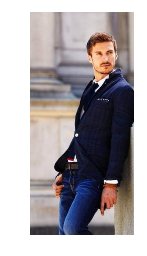

In [64]:
I = skio.imread('images/'+str(img['file_name']))
plt.figure(); plt.axis('off')
plt.imshow(I)
plt.show()

In [65]:
anns

[{u'area': 26476,
  u'bbox': [77.0, 22.0, 190.0, 229.0],
  u'category_id': 1,
  u'id': 10043485,
  u'image_id': 43485,
  u'iscrowd': 0,
  u'segmentation': {u'counts': u'h\\c0`1Z6>G2jN_N\\KQ2W4U1lK\\LY3Q4fLPLm2]4RMcKn2^4RMbKl2`4SM`Ki2e4WM[K`2m4aMSK]2o4cMQK\\2P5dMPK\\2P5cMQK\\2P5dMPK[2Q5eMoJ[2Q5dMPK\\2P5dMPK[2Q5eMoJZ2R5fMoJY2]5O0O2N2O0O2O2M3N6I3N0O1000N100100O1O100O1O100O1000000O1O1O1O1N1O10O1aIfNZ6c1M2N2N3M3M2N000VJoMe5R2ZJQNc5o1]JnM01a5Q2_JVN^5Y2L3M3N4K4J4N3M5K3L7H6K3I8L6CeKiLb4R39M2N2O0O2O000001N1`MUM^N1G1Fj2U2[MUN6@K5e2V2dMaM70E4c2[2SOaMP1_2Y2lNcJD^5;bJE^5<bJBc5\\1O07I2N1O00001O1O104K01O001O0011N01N1000000O2O1O0000001N1O101O0PMUNKk16[NCf1=_N]Oa1d0dNVO]1k0cNSO]1o0dNoN[1S1hNhNY1\\1fN`N[1a1iNYNZ1g1iNSNY1m1hNQNY1P2gNmM\\1S2eNjM^1S2eNiM`1T2cNgMh1P2[NkMg1T2`NcMe1[2^N_Mi1]2n101O1N2O1N9H0O01O010003L01O1O010O03NO11O2M2M2O2H8L3M5K3N2N2N3M3MmHYOP7d07N4M3M2N2O1O1O1N4Moa>',
   u'size': [256, 326]}}]

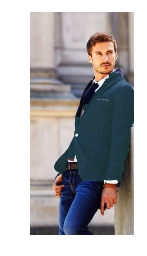

In [66]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)